# Setup

## Colab

In [1]:
# # # Mount the drive and move to dir
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# Switch to current dir
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the utilities and the dataloader
from utils import trainutil, inferutil, setuputil
from classes.models import BertPooler

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPooler)

# Import the funcs needed from utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_unified
from utils.inferutil import infer_one, infer_full, binfer_one, binfer_full

# Import the model
from classes.models.BertPooler import BertPooler

## Configuration

In [3]:
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPooler",
    "model_base": "bert-base-cased",
    # System Configuration
    "device": "cuda:0",
    "threads": 10,
    "seed": 0,
    # Data Configuration
    "data_dir": "../data",
    "data_ds": "manual",
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 2,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 20,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 10,
    "patience": 2,
    "save_int": 0,
    "save_dir": "../models/",
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 40/40 [00:09<00:00,  4.19it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 2840.13it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3336.23it/s]



5(P) = 5(G) + 0(E)
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPooler",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 2,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 20,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 10,
  "patience": 2,
  "save_

# Model Creation

In [4]:
# 1) Create model and move to GPU Observe its architecture - 440 Mib
untrained_model = BertPooler(config).to(DEVICE)
print(untrained_model)

BertPooler(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
     

# Model Training

In [5]:
# Train with adjusted batch size
trained_model = train_unified(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.37s/it]


Train Loss: 1.3860112428665161, Perplexity: 1.0000277206090664
Val Loss: 1.3705809116363525, Perplexity: 1.0000274119939345


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.80s/it]


Train Loss: 1.3835387825965881, Perplexity: 1.0000276711584914
Val Loss: 1.3326138257980347, Perplexity: 1.000026652631691


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.90s/it]


Train Loss: 1.2815519571304321, Perplexity: 1.0000256313676206
Val Loss: 0.8994006514549255, Perplexity: 1.0000179881748144


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.83s/it]


Train Loss: 0.8525619506835938, Perplexity: 1.000017051384387
Val Loss: 0.6148540377616882, Perplexity: 1.0000122971563647


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.73s/it]


Train Loss: 0.5982622802257538, Perplexity: 1.0000119653171884
Val Loss: 0.4675002098083496, Perplexity: 1.0000093500479077


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.83s/it]


Train Loss: 0.45833244919776917, Perplexity: 1.0000091666909978
Val Loss: 0.38029712438583374, Perplexity: 1.000007605971413


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.66s/it]


Train Loss: 0.3741613179445267, Perplexity: 1.0000074832543584
Val Loss: 0.32143551111221313, Perplexity: 1.0000064287308865


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.65s/it]


Train Loss: 0.3177013397216797, Perplexity: 1.0000063540469812
Val Loss: 0.2828352749347687, Perplexity: 1.0000056567214979


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:23<00:00, 23.01s/it]


Train Loss: 0.277673676609993, Perplexity: 1.0000055534889527
Val Loss: 0.24530324339866638, Perplexity: 1.0000049060769027


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.88s/it]


Train Loss: 0.24684568494558334, Perplexity: 1.0000049369258854
Val Loss: 0.2227596640586853, Perplexity: 1.0000044552032055



TRAINING DONE at epoch 9, best epoch 9
Train Loss = 0.24684568494558334, Perplexity = 1.0000049369258854
Val Loss = 0.2227596640586853, Perplexity = 1.0000044552032055



Filename: ../data/manual_train/dlportfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,2): 0.90754932165145874023
(0,0): 0.90755057334899902344
(5,0): 0.90755939483642578125
(4,6): 0.90756136178970336914
(5,3): 0.90756160020828247070
(4,8): 0.90756273269653320312
(4,16): 0.90756648778915405273
(4,14): 0.90756744146347045898
(4,2): 0.90756767988204956055
(4,10): 0.90756887197494506836
(4,18): 0.90756905078887939453
(4,4): 0.90757131576538085938
(7,0): 0.90757268667221069336
(19,0): 0.90757542848587036133
(11,0): 0.90757632255554199219
(6,0): 0.90757638216018676758
(7,1): 0.90757727622985839844
(9,1): 0.90757834911346435547
(6,1): 0.90757864713668823242
(8,1): 0.90758168697357177734

NB to B ratio: Predicted = 9911:89 | Actual = 9912:88
Accuracy: 99.99% | Precision: 98.88% | Recall: 100.00% | F1-Score: 0.99



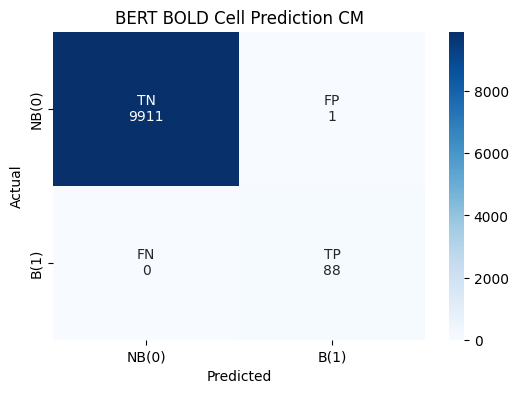


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Params
loc = 0
thresh = 0.9
cond = '>'
disp_max=True

# inference on single position of train loader params
binfer_one(
    trained_model,
    train_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)


Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.82498437166213989258
(6,2): 0.90754932165145874023
(6,3): 0.90755099058151245117
(5,4): 0.90755480527877807617
(5,2): 0.90755599737167358398
(6,0): 0.90755939483642578125
(5,6): 0.90756195783615112305
(5,16): 0.90756553411483764648
(5,8): 0.90756630897521972656
(5,12): 0.90757209062576293945
(19,0): 0.90757268667221069336
(5,10): 0.90757441520690917969
(31,0): 0.90757542848587036133
(23,0): 0.90757632255554199219
(15,0): 0.90757638216018676758
(7,1): 0.90757727622985839844
(5,14): 0.90757745504379272461
(9,1): 0.90757834911346435547
(10,1): 0.90757864713668823242
(11,0): 0.90757995843887329102
(7,0): 0.90758138895034790039
(8,1): 0.90758168697357177734

NB to B ratio: Predicted = 9913:87 | Actual = 9896:104
Accuracy: 99.81% | Precision: 98.85% | Recall: 82.69% | F1-Score: 0.90



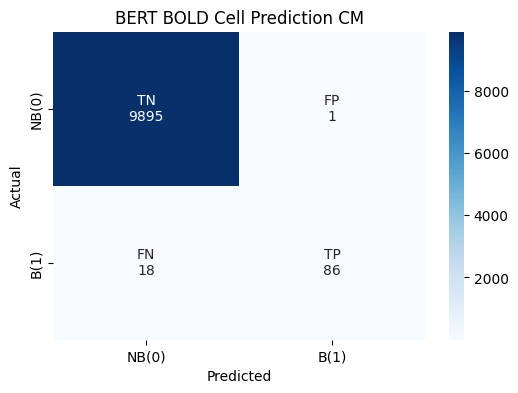


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
binfer_one(
    trained_model,
    val_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)


Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,14): 0.12648957967758178711
(5,18): 0.13812001049518585205
(5,4): 0.89755123853683471680
(5,2): 0.90151625871658325195
(5,16): 0.90649002790451049805
(5,8): 0.90691369771957397461
(5,6): 0.90719068050384521484
(6,2): 0.90754932165145874023
(6,3): 0.90755099058151245117
(0,0): 0.90755856037139892578
(6,0): 0.90755939483642578125
(25,0): 0.90757268667221069336
(9,0): 0.90757441520690917969
(5,10): 0.90757465362548828125
(37,0): 0.90757542848587036133
(29,0): 0.90757632255554199219
(21,0): 0.90757638216018676758
(5,12): 0.90757650136947631836
(9,1): 0.90757727622985839844
(5,20): 0.90757745504379272461
(7,1): 0.90757834911346435547
(7,0): 0.90757858753204345703
(8,1): 0.90757864713668823242
(17,0): 0.90757995843887329102
(13,0): 0.90758138895034790039
(10,1): 0.90758168697357177734

NB to B ratio: Predicted = 9855:145 | Actual = 9872:128
Accuracy: 99.71% | Precision: 84.14

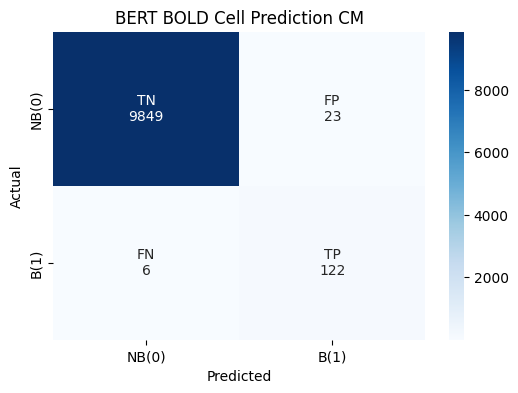


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
binfer_one(
    trained_model,
    test_loader,
    loc=loc,
    threshold=thresh,
    condition=cond,
    disp_max=disp_max,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:22<00:00, 22.50s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396681:3319 | Actual = 396714:3286
Accuracy: 99.99% | Precision: 99.01% | Recall: 100.00% | F1-Score: 1.00



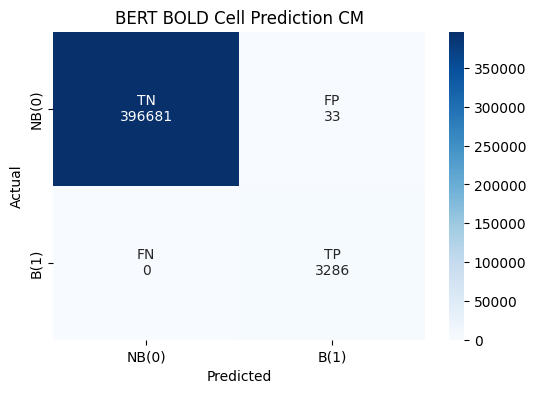

In [10]:
binfer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=40,
    threshold=thresh,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:22<00:00, 22.26s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49616:384 | Actual = 49602:398
Accuracy: 99.96% | Precision: 98.96% | Recall: 95.48% | F1-Score: 0.97



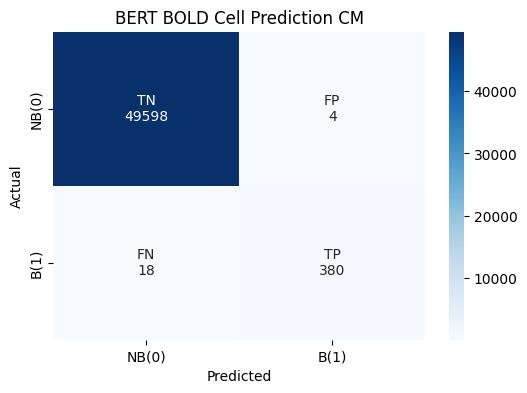

In [11]:
binfer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=10,
    threshold=thresh,
    device=DEVICE
)

Batch Inference: 100%|██████████| 1/1 [00:22<00:00, 22.09s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49586:414 | Actual = 49606:394
Accuracy: 99.94% | Precision: 93.72% | Recall: 98.48% | F1-Score: 0.96



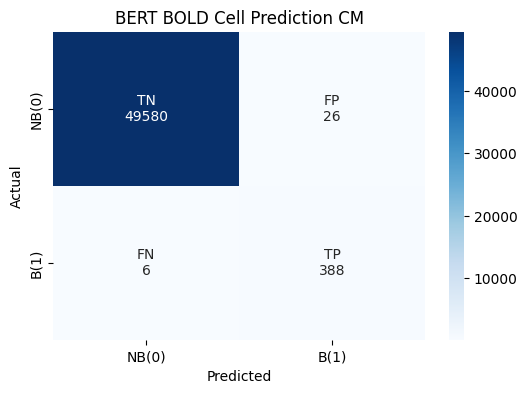

In [12]:
binfer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=10,
    threshold=thresh,
    device=DEVICE
)